C:\Users\Access\AppData\Local\Temp\ipykernel_1472\3014941353.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_cols] = data[categorical_cols].astype('category')
C:\Users\Access\AppData\Local\Temp\ipykernel_1472\3014941353.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_cols] = data[categorical_cols].apply(lambda x: x.cat.codes)
C:\Users\Access\AppData\Local\Temp\ipykernel_1472\3014941353.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

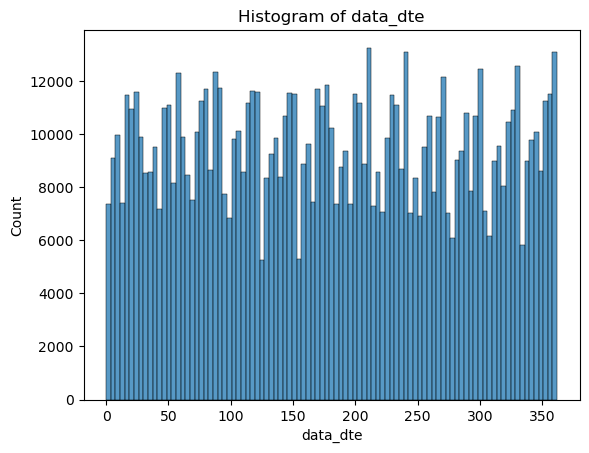

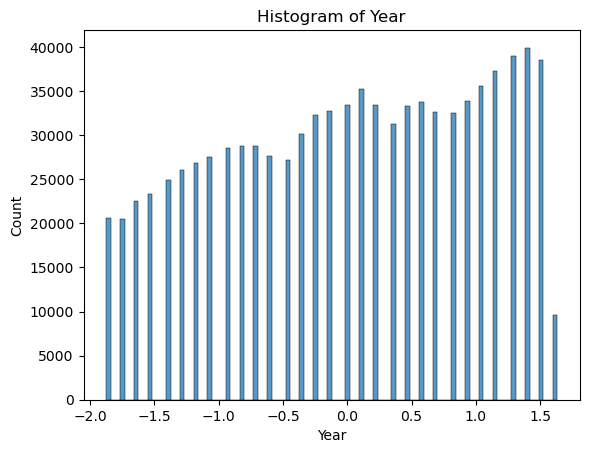

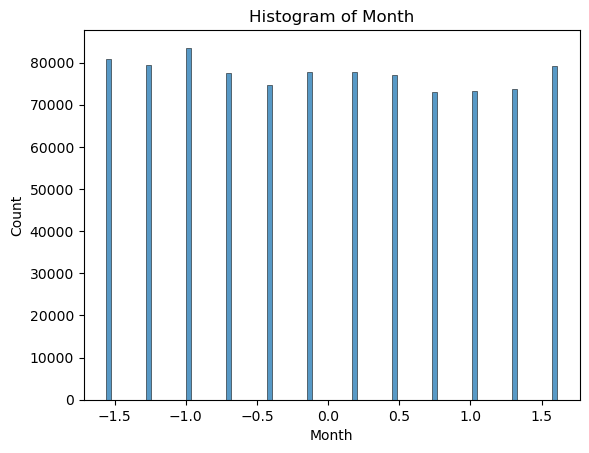

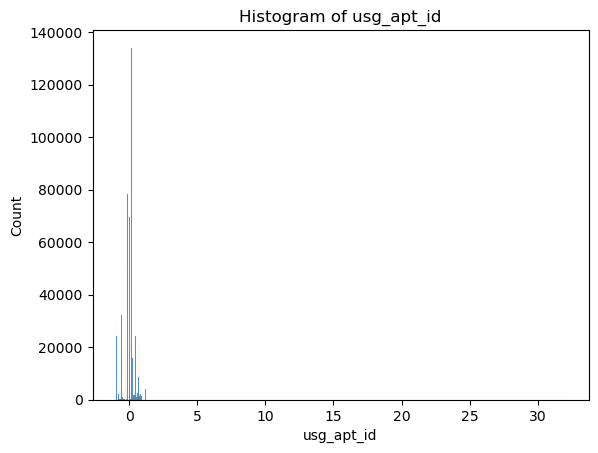

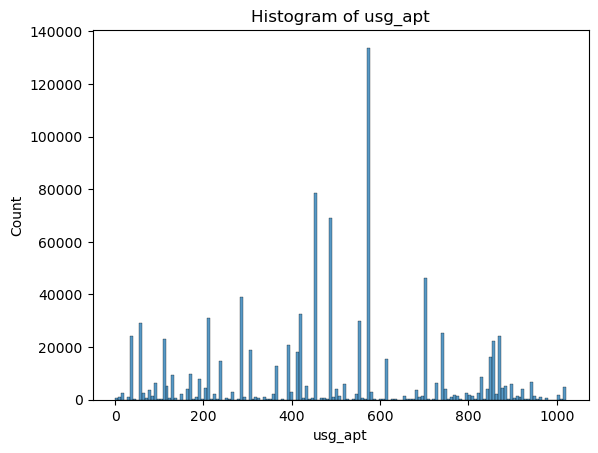

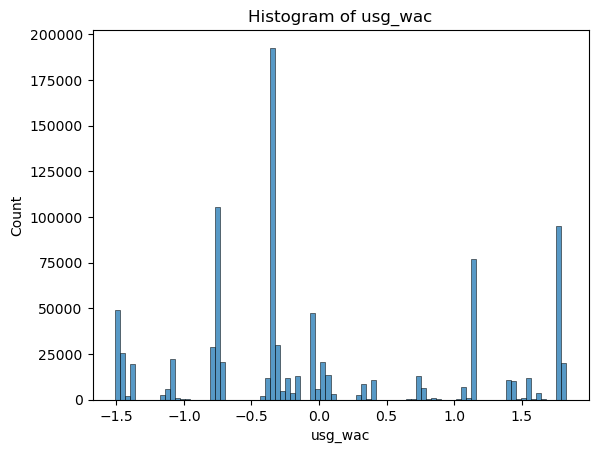

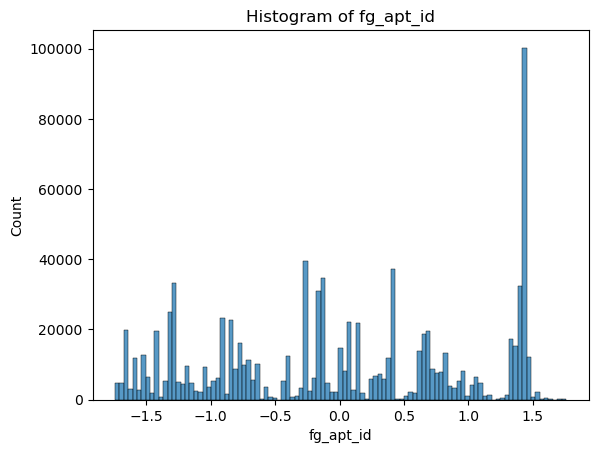

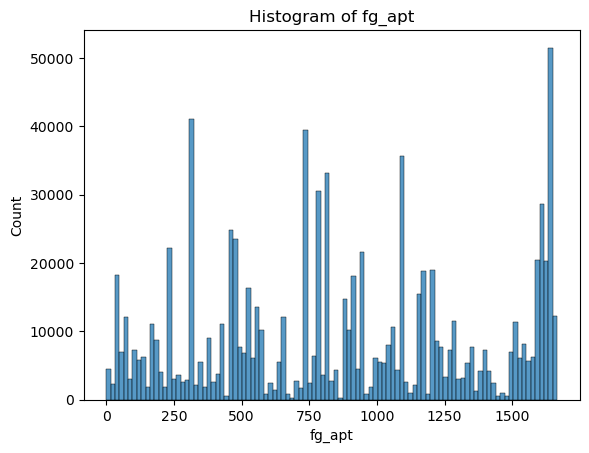

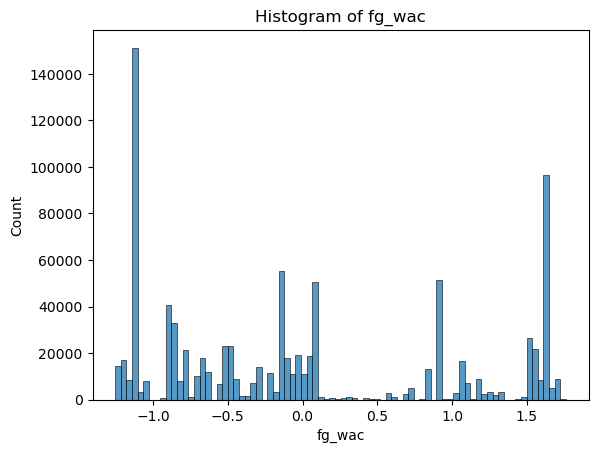

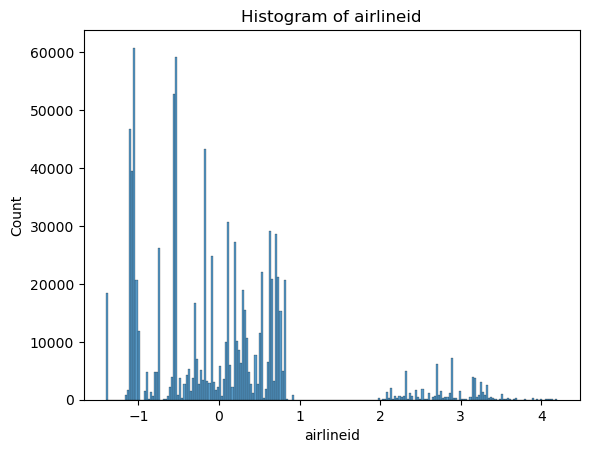

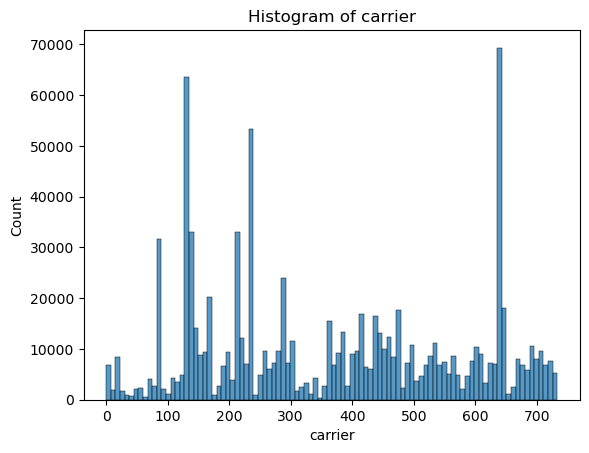

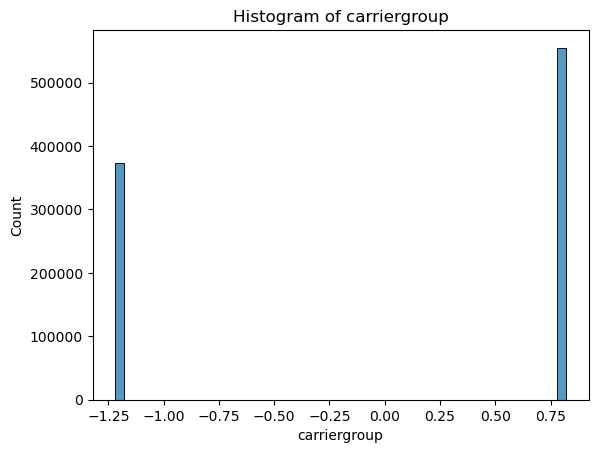

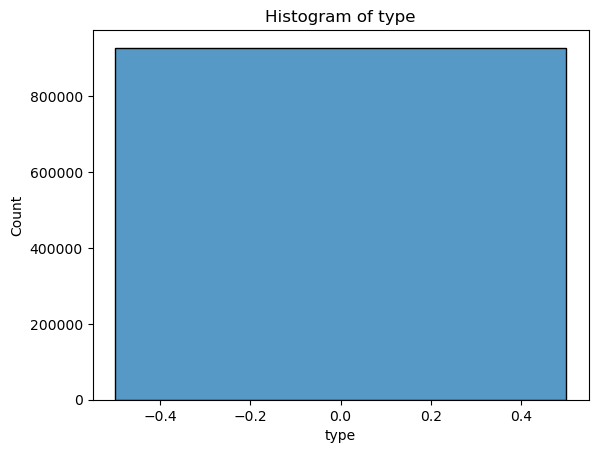

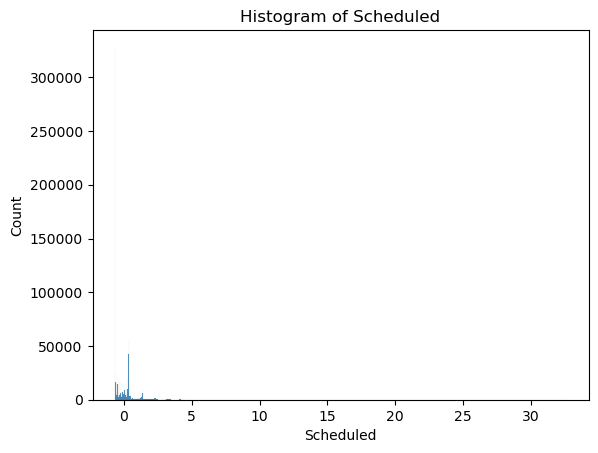

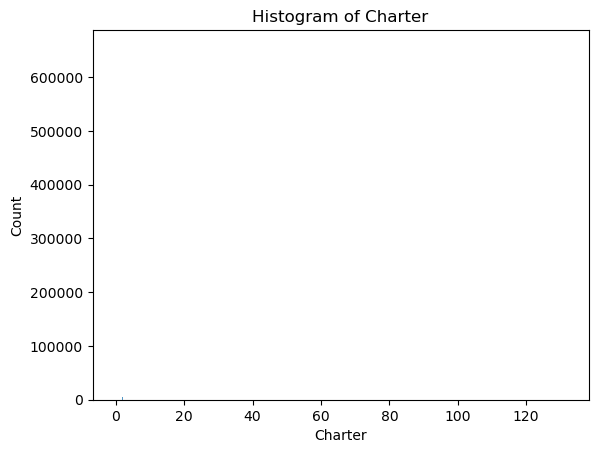

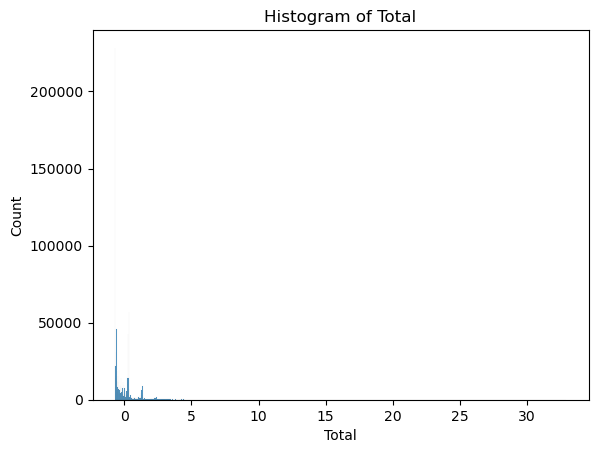

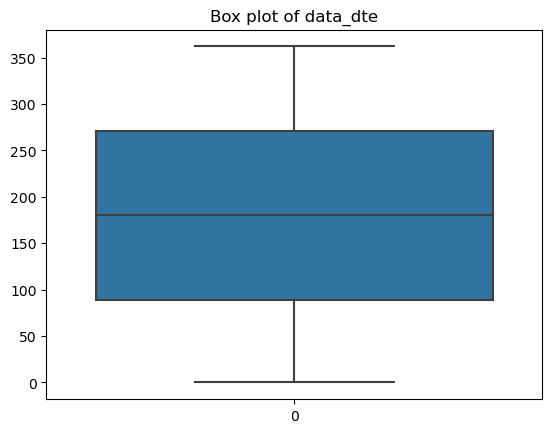

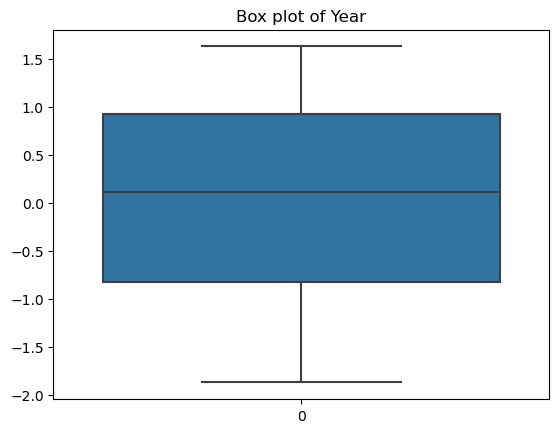

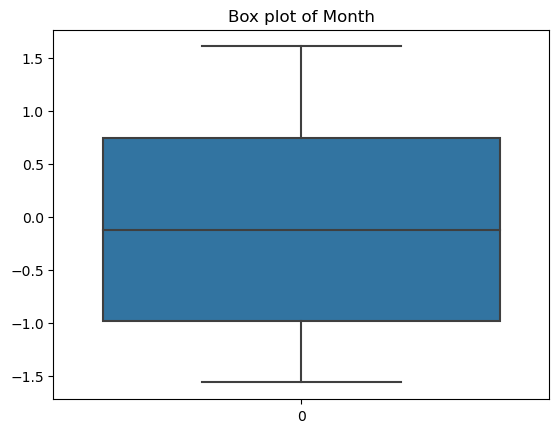

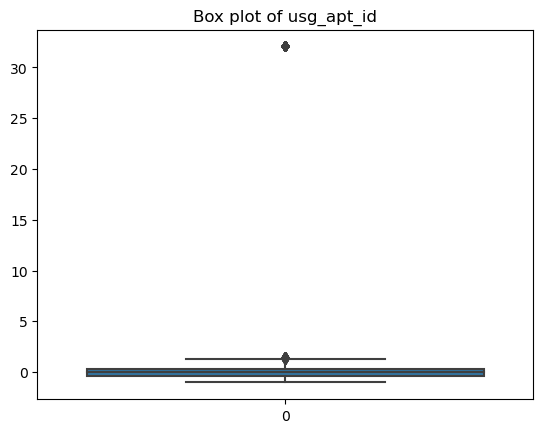

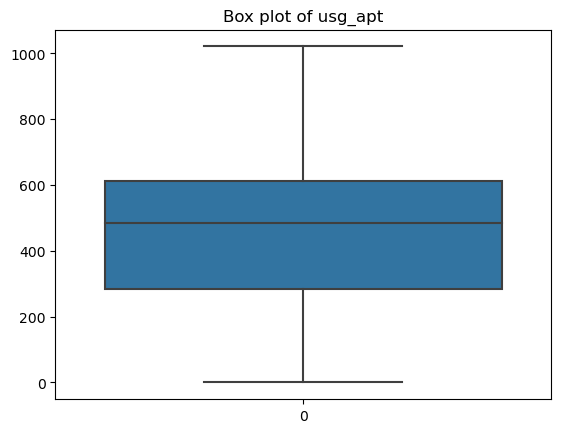

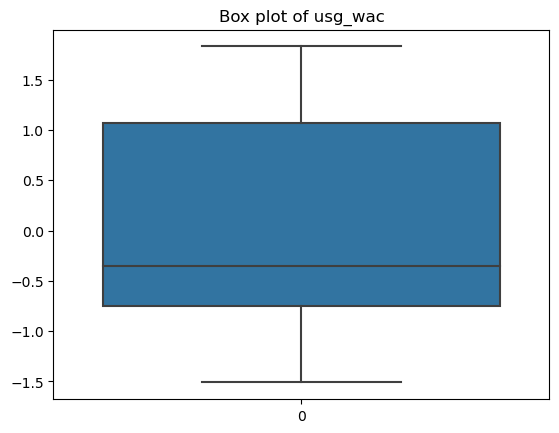

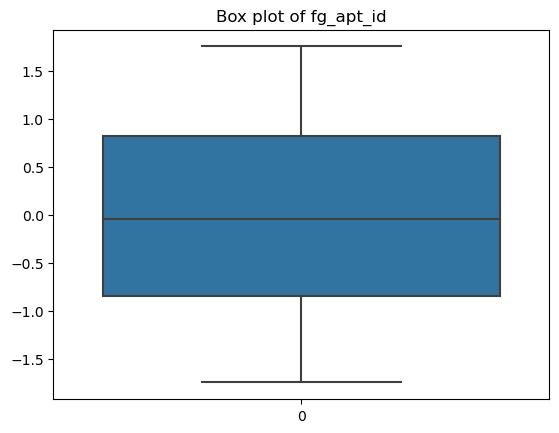

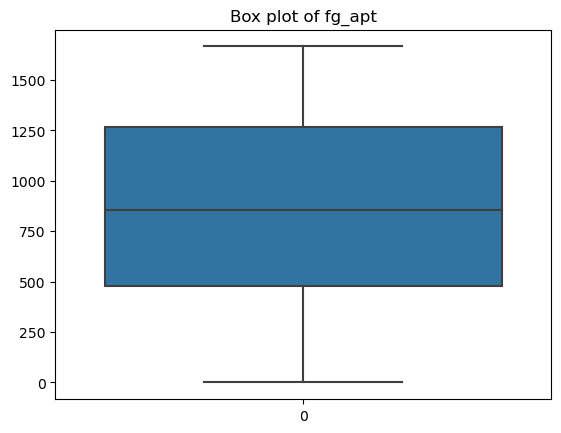

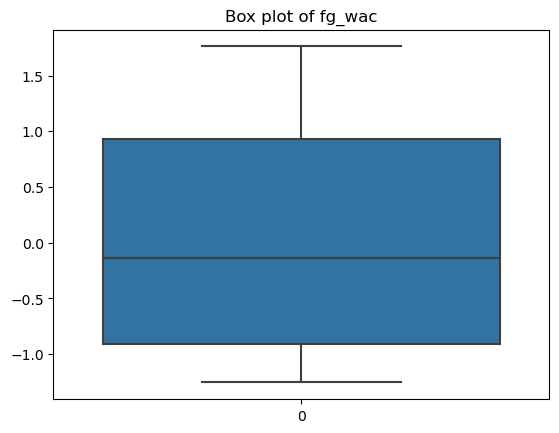

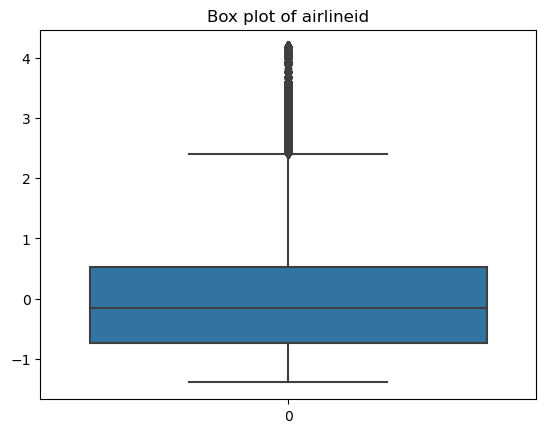

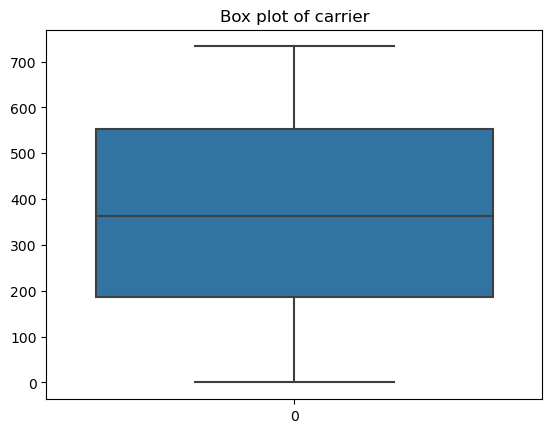

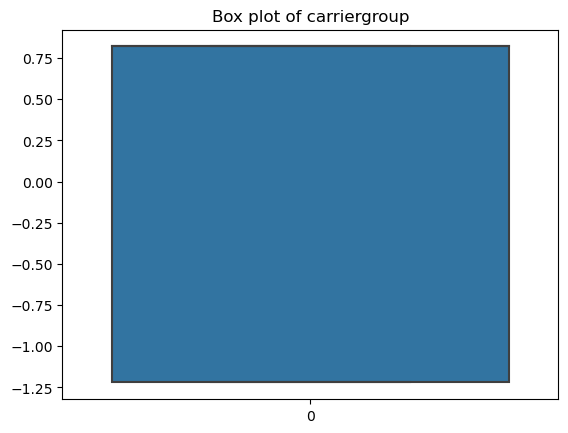

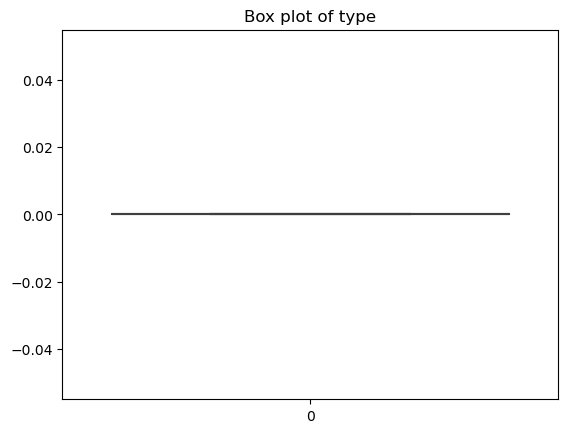

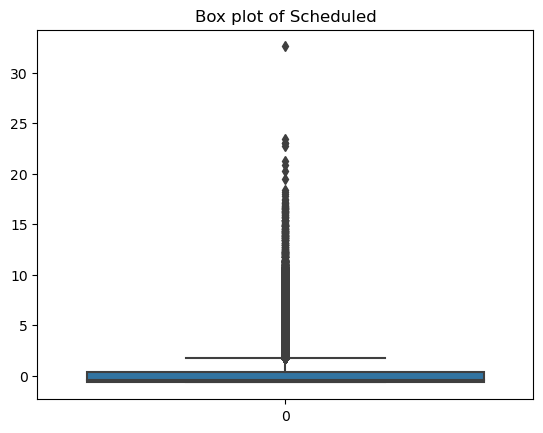

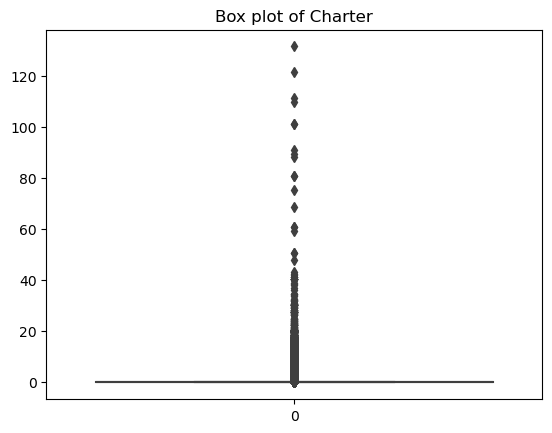

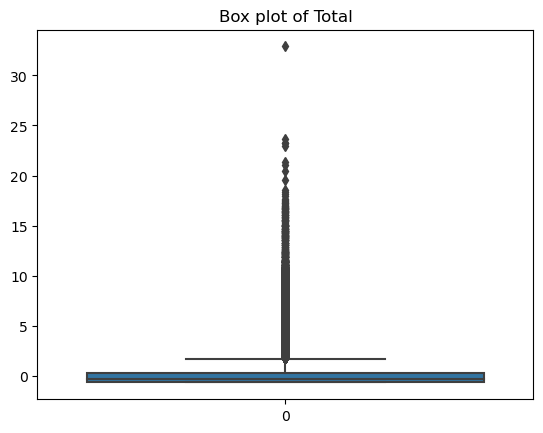

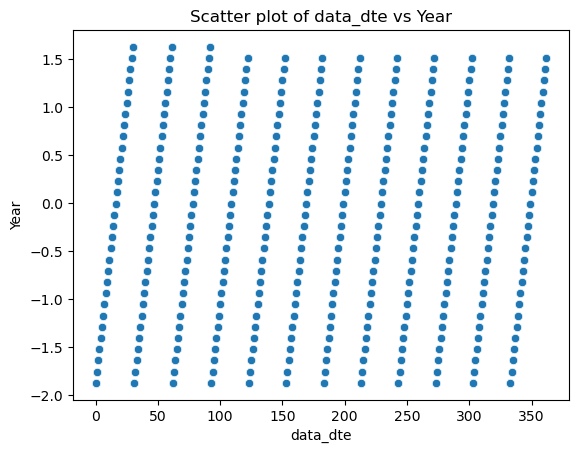

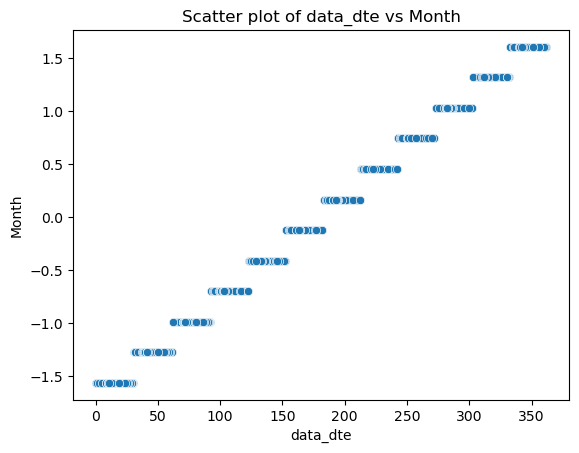

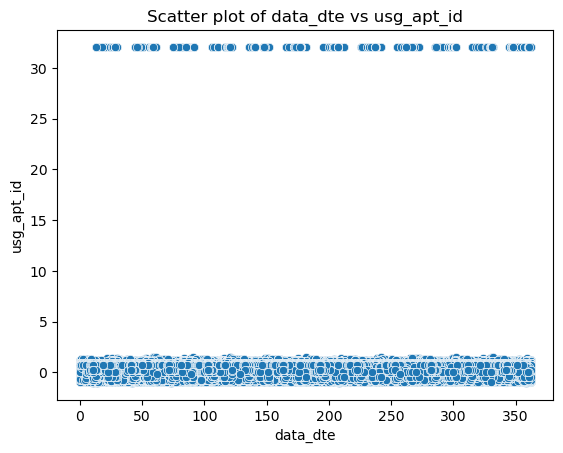

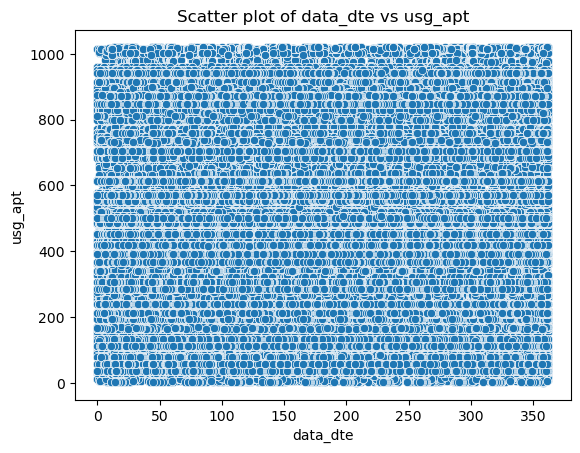

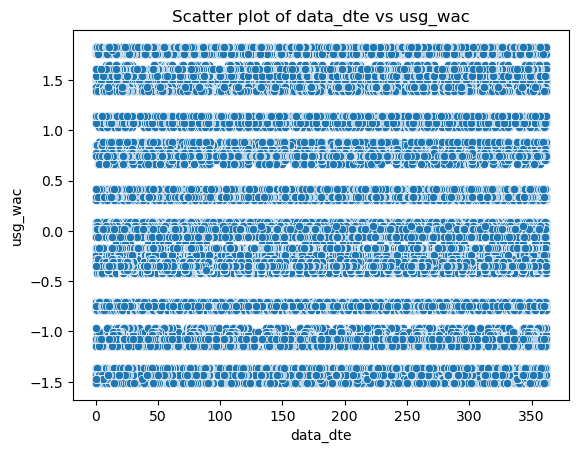

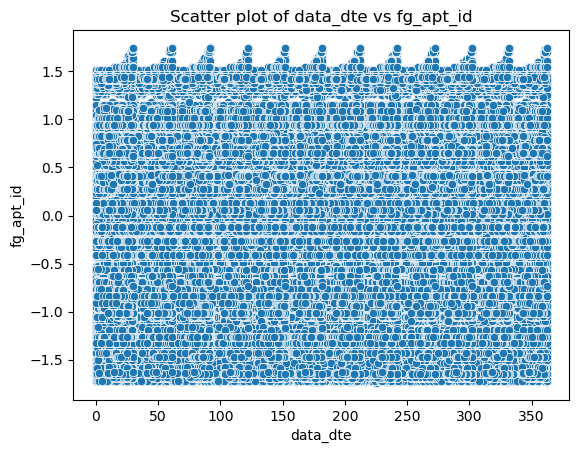

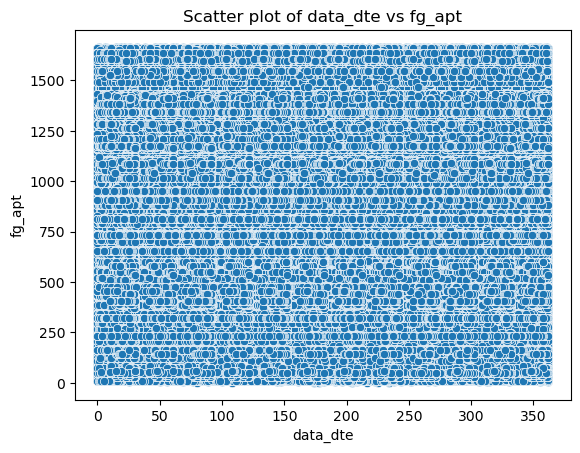

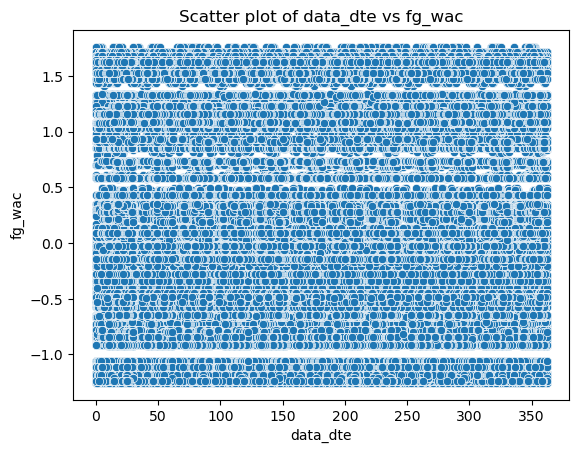

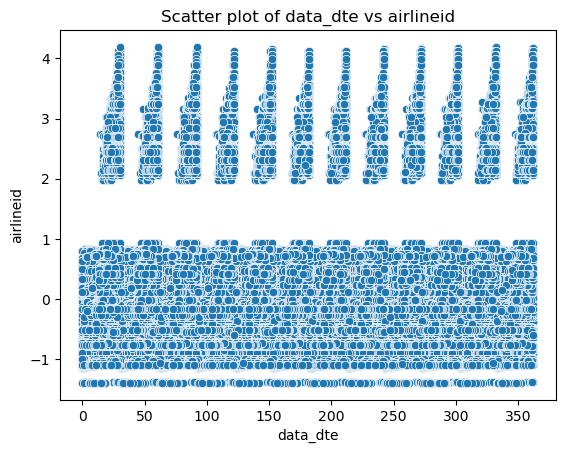

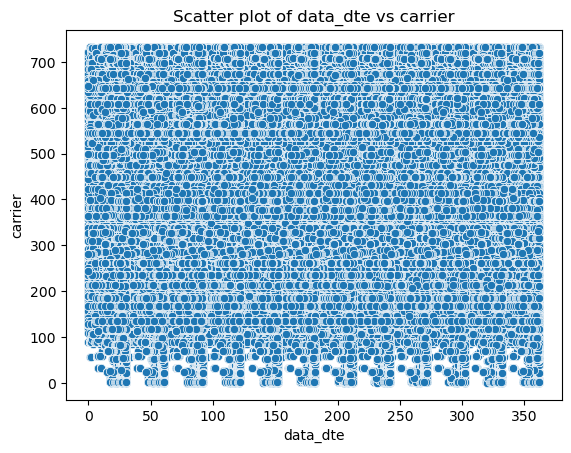

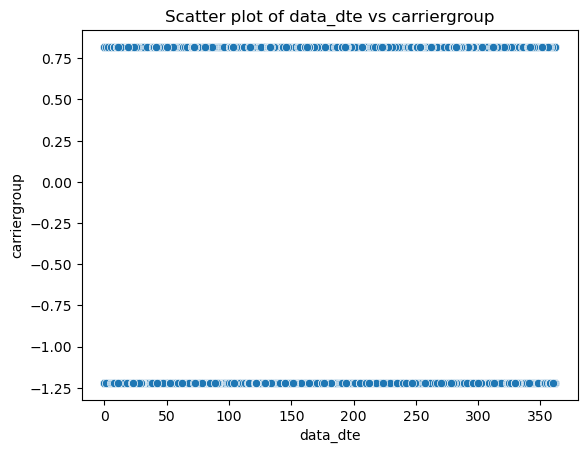

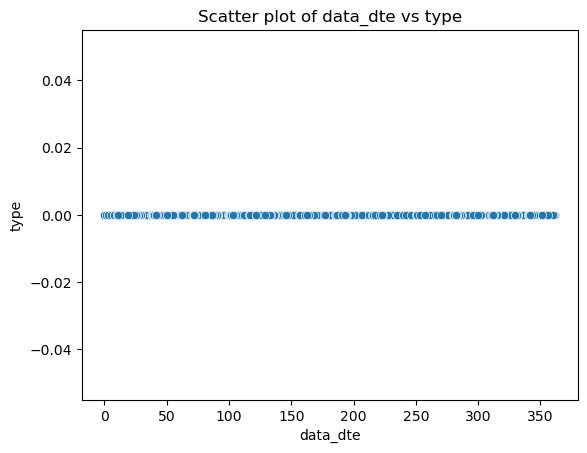

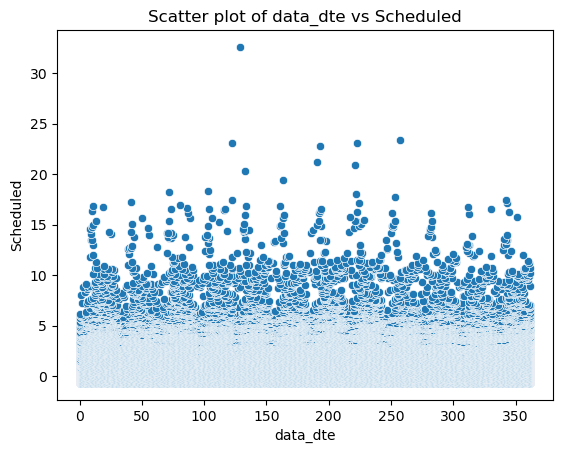

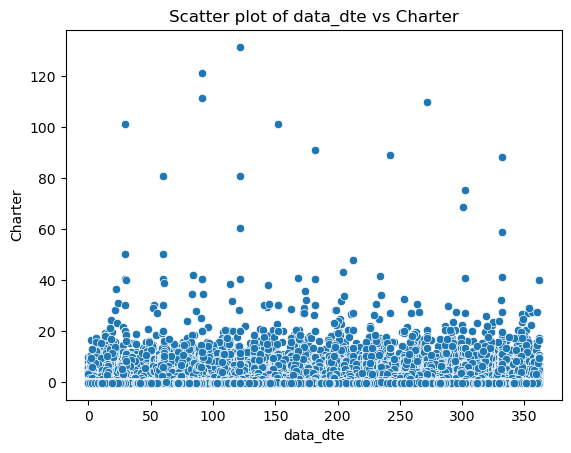

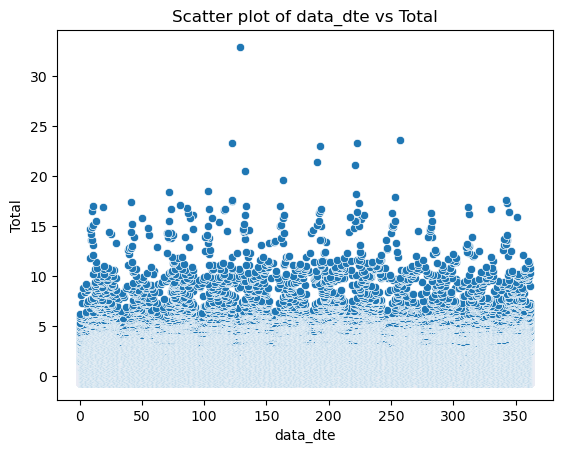

KeyboardInterrupt: 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Function to load data from different file formats
def load_data(file_path):
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        # Load data from SQL database
        # Implement your code here
        pass
    else:
        raise ValueError("Unsupported file format")
    
    return data

# Function to preprocess the data
def preprocess_data(data):
    # Identify data types of each column
    data_types = data.dtypes
    
    # Handle missing values
    data = data.dropna()
    
    # Encode categorical features
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data[categorical_cols] = data[categorical_cols].apply(lambda x: x.cat.codes)
    
    # Scale numerical features
    numerical_cols = data.select_dtypes(include=['float', 'int']).columns
    data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()
    
    return data

# Function to generate visualization dashboard
def generate_visualizations(data):
    # Generate histograms
    for column in data.columns:
        plt.figure()
        sns.histplot(data[column])
        plt.title(f"Histogram of {column}")
        plt.show()
    
    # Generate box plots
    for column in data.columns:
        plt.figure()
        sns.boxplot(data[column])
        plt.title(f"Box plot of {column}")
        plt.show()
    
    # Generate scatter plots
    for column1 in data.columns:
        for column2 in data.columns:
            if column1 != column2:
                plt.figure()
                sns.scatterplot(data=data, x=column1, y=column2)
                plt.title(f"Scatter plot of {column1} vs {column2}")
                plt.show()
    
    # Generate interactive visualizations using Plotly
    fig = px.scatter_matrix(data)
    fig.show()

# Main function
def main():
    # Load data
    file_path = 'International_Report_Departures.csv'
    data = load_data(file_path)
    
    # Preprocess data
    preprocessed_data = preprocess_data(data)
    
    # Generate visualization dashboard
    generate_visualizations(preprocessed_data)

# Run the main function
if __name__ == '__main__':
    main()